In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow import keras

In [2]:
def load_data():
    '''
    Returns contents of data{0..1}.npy
    '''
    train_data = np.zeros((1, 40, 168))
    train_labels = np.zeros((1,))
    for i in range(2):
        tmp_data = np.load('./Data/data{}.npy'.format(i))
        tmp_labels = np.load('./Data/lab{}.npy'.format(i))        
        train_data = np.concatenate((train_data, tmp_data), axis = 0)
        train_labels = np.concatenate((train_labels, tmp_labels), axis = 0)
    return train_data[1:], train_labels[1:]

In [3]:
# del train_data, train_labels
train_data, train_labels = load_data()

In [4]:
def show_images(x, num = 100, caption = None):
    '''
    Args :
    x => (n * 40 * 168 array, containing n images)
    num => number of images to be shown
    caption => Array of size n * 1 containing captions to be put on top of the images
    '''
    k = 4
    assert num % k == 0, "Num must be a multiple of {}!".format(k)
    if caption is None:
        caption = np.arange(num)
#     assert caption.size == num, "Num must be a multiple of 10!"
    ratio = 168 / 40
    rows = num // k
    fig, axs = plt.subplots(rows, k, figsize = (k * ratio, rows))
    
    for i in range(rows):
        for j in range(k):
            h = i * k + j
            axs[i, j].imshow(x[h], cmap="gray")
            axs[i, j].axis('off')
            axs[i, j].set_title("Sum = {}".format(caption[h]))
            
    plt.tight_layout()

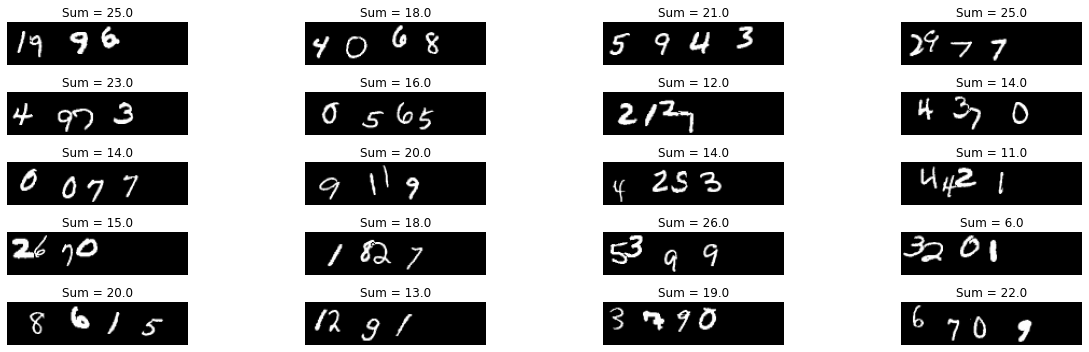

In [5]:
show_images(train_data, 20, caption = train_labels)

## Data preprocessing

* Convert to float32
* Flatten
* Normalize to 0, 1

In [6]:
def preprocess(data, labels):
    '''
    Preprocesses data to return a tensorflow tensor
    '''
    data = data.astype('float32')
    x = train_data.reshape((data.shape[0], -1))
    
    x /= 255
    x = tf.data.Dataset.from_tensor_slices((x, labels))
    return x

In [7]:
x_train = preprocess(train_data, train_labels)
x_train = x_train.batch(200).prefetch(1)

In [8]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(128, activation=tf.nn.relu)
        self.fc2 = layers.Dense(256, activation=tf.nn.relu)
        self.out = layers.Dense(37)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

# Build neural network model.
neural_net = NeuralNet()

In [9]:
def cross_entropy_loss(x, y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

In [10]:
optimizer = tf.optimizers.SGD(0.01)

In [11]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy_loss(pred, y)
        
    trainable_variables = neural_net.trainable_variables

    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [15]:
losses = []
accuracies = []

In [16]:
for step in range(200000):
    for _, (batch_x, batch_y) in enumerate(x_train.take(100), 1):
        run_optimization(batch_x, batch_y)
#     print(step)
    
    if step % 1000 == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        losses.append(loss)
        accuracies.append(acc)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 0, loss: 3.556961, accuracy: 0.110000
step: 10, loss: 3.524300, accuracy: 0.145000
step: 20, loss: 3.502247, accuracy: 0.155000
step: 30, loss: 3.491285, accuracy: 0.160000
step: 40, loss: 3.476670, accuracy: 0.180000
step: 50, loss: 3.472884, accuracy: 0.180000
step: 60, loss: 3.444456, accuracy: 0.220000
step: 70, loss: 3.409767, accuracy: 0.250000
step: 80, loss: 3.405453, accuracy: 0.250000
step: 90, loss: 3.399478, accuracy: 0.255000
step: 100, loss: 3.393625, accuracy: 0.260000
step: 110, loss: 3.392880, accuracy: 0.260000
step: 120, loss: 3.392433, accuracy: 0.260000
step: 130, loss: 3.392104, accuracy: 0.260000
step: 140, loss: 3.391840, accuracy: 0.260000
step: 150, loss: 3.391632, accuracy: 0.260000
step: 160, loss: 3.391412, accuracy: 0.260000
step: 170, loss: 3.391240, accuracy: 0.260000
step: 180, loss: 3.391116, accuracy: 0.260000
step: 190, loss: 3.390977, accuracy: 0.260000
step: 200, loss: 3.390833, accuracy: 0.260000
step: 210, loss: 3.390734, accuracy: 0.260000

step: 1770, loss: 3.274406, accuracy: 0.375000
step: 1780, loss: 3.274402, accuracy: 0.375000
step: 1790, loss: 3.274398, accuracy: 0.375000
step: 1800, loss: 3.274394, accuracy: 0.375000
step: 1810, loss: 3.274390, accuracy: 0.375000
step: 1820, loss: 3.274386, accuracy: 0.375000
step: 1830, loss: 3.274381, accuracy: 0.375000
step: 1840, loss: 3.274376, accuracy: 0.375000
step: 1850, loss: 3.272678, accuracy: 0.380000
step: 1860, loss: 3.267487, accuracy: 0.385000
step: 1870, loss: 3.266523, accuracy: 0.385000
step: 1880, loss: 3.266068, accuracy: 0.385000
step: 1890, loss: 3.265701, accuracy: 0.385000
step: 1900, loss: 3.265490, accuracy: 0.385000
step: 1910, loss: 3.265320, accuracy: 0.385000
step: 1920, loss: 3.265237, accuracy: 0.385000
step: 1930, loss: 3.265050, accuracy: 0.385000
step: 1940, loss: 3.264965, accuracy: 0.385000
step: 1950, loss: 3.264873, accuracy: 0.385000
step: 1960, loss: 3.264834, accuracy: 0.385000
step: 1970, loss: 3.264740, accuracy: 0.385000
step: 1980, l

Text(0, 0.5, 'Accuracy')

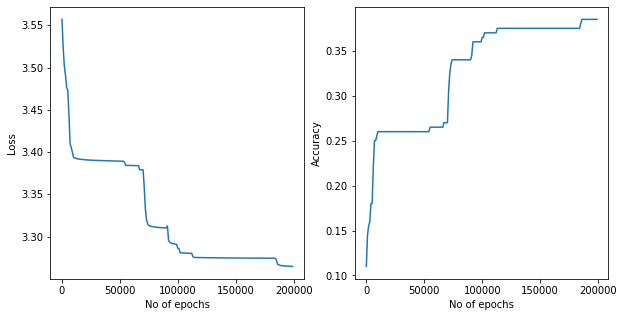

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
epochs = np.arange(0, 200000, 1000)
ax[0].plot(epochs, losses)
ax[0].set_xlabel("No of epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs, accuracies)
ax[1].set_xlabel("No of epochs")
ax[1].set_ylabel("Accuracy")


# fig.tight_layout()